# Create a Neural Net and train it on MNIST-Dataset

In this example I show how to build a Neural-Net with my API and train it on the MNIST-Dataset 

## Imports

First the Imports:
We need numpy for preparing the data. For downloading the dataset i use tensorflow keras. I also import some functions i need and explain later

In [1]:
from main import Model                # the main class
from optimizer import Adam            # the optimizer i will use for training
import numpy as np
import tensorflow.keras as keras      # just for downloading the dataset
from EvaluationPlot import *          # some functions for plotting
from helperfunctions import one_hot   # hot-encodes values

## Preparing the Data for training

Now download the MNIST-Dataset. Includes a training-set with 60.000 examples and a test-set with 10.000 examples.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path='mnist.npz')

befor starting the training the Input-data (x_train, x_test) should be scaled between 0-1. At the moment it is scaled from 0-255, so i devide it by 255

In [3]:
x_train = x_train / 255
x_test = x_test / 255

After that I reshape the Data for training. Because the Model expectet Examples with 3 dims. 

In [4]:
x_train = x_train.reshape(len(x_train), 1, 28, 28)
x_test = x_test.reshape(len(x_test), 1, 28, 28)

Now the input-data is ready for training. I can show some examples with a small function i have writen.

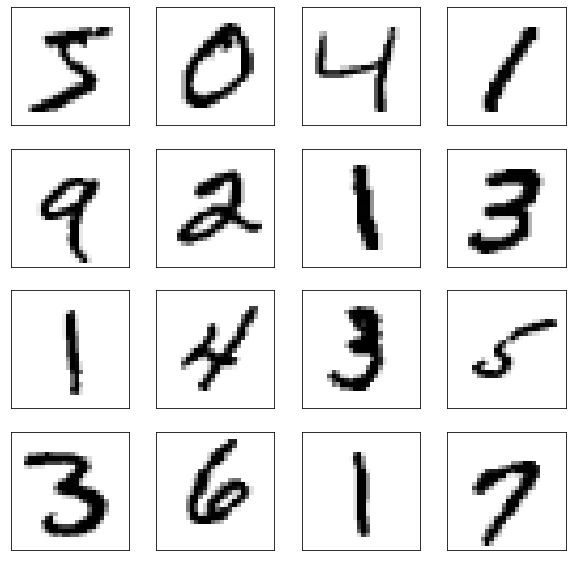

In [5]:
show_images(x_train[:16])

Because our Model will output a vector with a probability for every possible digit, we have to hot-encode the labels in y_train and y_test. For this i have the function 'one_hot'.

In [6]:
labels_train = y_train
labels_test = y_test

y_train = one_hot(y_train)
y_test = one_hot(y_test)

Now we have prepaired the Data and can start creating the Model

## Creating the Model

For creating a Model i use my Model class. I init a Model with the name 'example'. 

In [7]:
nn = Model(model_name='example')

Next we define the architecture for the model. The compile function of Model takes a list. For every layer we want to have in the Model we create a dictionary with the type of layer we want to use and the specific hyperparameter.

For this example a created a architecture with 7 Layer. Every Layer exept the last one works BatchNorm the Relu-activationfunction and a 20% Dropout. I don't use a bias, because it would be canceled out in the BatchNorm. The alpha value in BatchNorm defines the degree of weighting decrease on the moving mean and var.

In [ ]:
The first layer (in our case the 'Flatten' layer) must have a input_shape. Every next Layer take the output shape of the layer before as an input-shape.

In [8]:
architecture = [
        {"layer_type": "Flatten", 'input_shape': (1, 28, 28)},

        {"layer_type": "Dense", "neurons": 128, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 128, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 64, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense",  "neurons": 64, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 32, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.98},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 32, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.98},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 10}
    ]


For training the Model i use a Adam optimizer with a learning-rate of 0.1

In [9]:
optimizer = Adam(lr=.1)

Now we can compile the model 

As loss function i use categorical crossentropy aka Softmax-loss.

In [10]:
nn.compile(architecture, loss='categorical_crossentropy', optimizer=optimizer)

Before we start to training the model we can print out a summary of our Model with the 'summary'-function.

In [11]:
nn.summary()

example summary:
layer-type                input_shape    output_shape    neurons    trainable-params    activation-function
------------------------  -------------  --------------  ---------  ------------------  ---------------------
Flatten                   (1, 28, 28)    (784,)          0          0                   -
Dense                     (784,)         128             128        100480              -
BatchNormalization        128            128             0          256                 -
Activation                128            128             0          0                   relu
Dropout                   128            128             0          0                   -
Dense                     128            128             128        16512               -
BatchNormalization        128            128             0          256                 -
Activation                128            128             0          0                   relu
Dropout                   128          

## Train the Model

Now we can train the model. We use the x- and y-train as trainingsset and the x-and y-test as test set. As size of the mini-batch a took 128, which work well on my previos trainings. After every epoch the trainingsset gets shuffled  ('shuffle=True'). So we don't train on the same mini-batch twice.

With the 'policy' parameter i can the define a policy for the training. The training-function basically saves after every epoch. With this parameters i define when to load a old snapshot. The options are:  
'acc' load when acc is lower then last epoch  
'loss' load when loss is lower then last epoch  
'one' load when loss or acc is lower then last epoch  
'both' load when loss and acc is lower then last epoch  
'none' don't load at any time (default)  

The trainingsprocess is shown with a processbar and a estimate time till the epoch is finished. After every epoch the 'train'-functions tests the model on the test data. The result loss an d accuracy is printed out.

In [12]:
loss, acc = nn.train(x_train, y_train, batchsize=128, epochs=1, shuffle=True, x_test=x_test, y_test=y_test, policy='acc')

start training [epochs: 1, batchsize: 128, shuffle: True, policy: acc]
epoch 1 / 1: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 469 of 469 batches trained (0h 0min 0sec)) 
epoch 1: loss: 1.3594448271606983 acc: 0.9151
 
training finished in 0h 0min 35sec.
loss: 1.3594448271606983 accuracy: 0.9151


After finish the training. We can plot the trainingsprocess. For this i wrote a function 'plot_trainingsprocess'. As Input of this function we take the list of loss and acc we get from the 'train'-function.

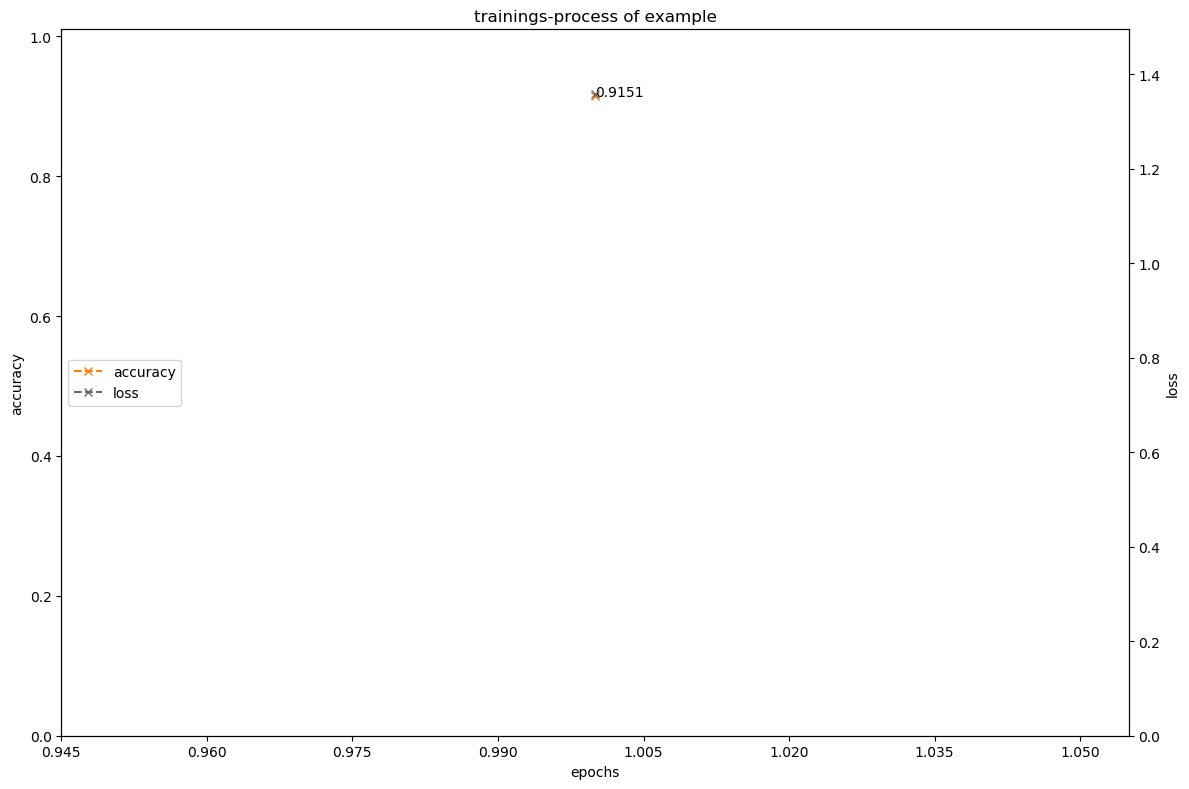

In [13]:
plot_trainingsprocess(loss, acc, name=nn.model_name, save=True)

## Predict some Data

After training a Model. We can now predict some Data. For this a Model class has the 'predict' function. With the 'return_probability' parameter it also returns a probability for every class.

In [14]:
pred, prob = nn.predict(x_test, return_probability=True)

We can show this with an other function i wrote. 

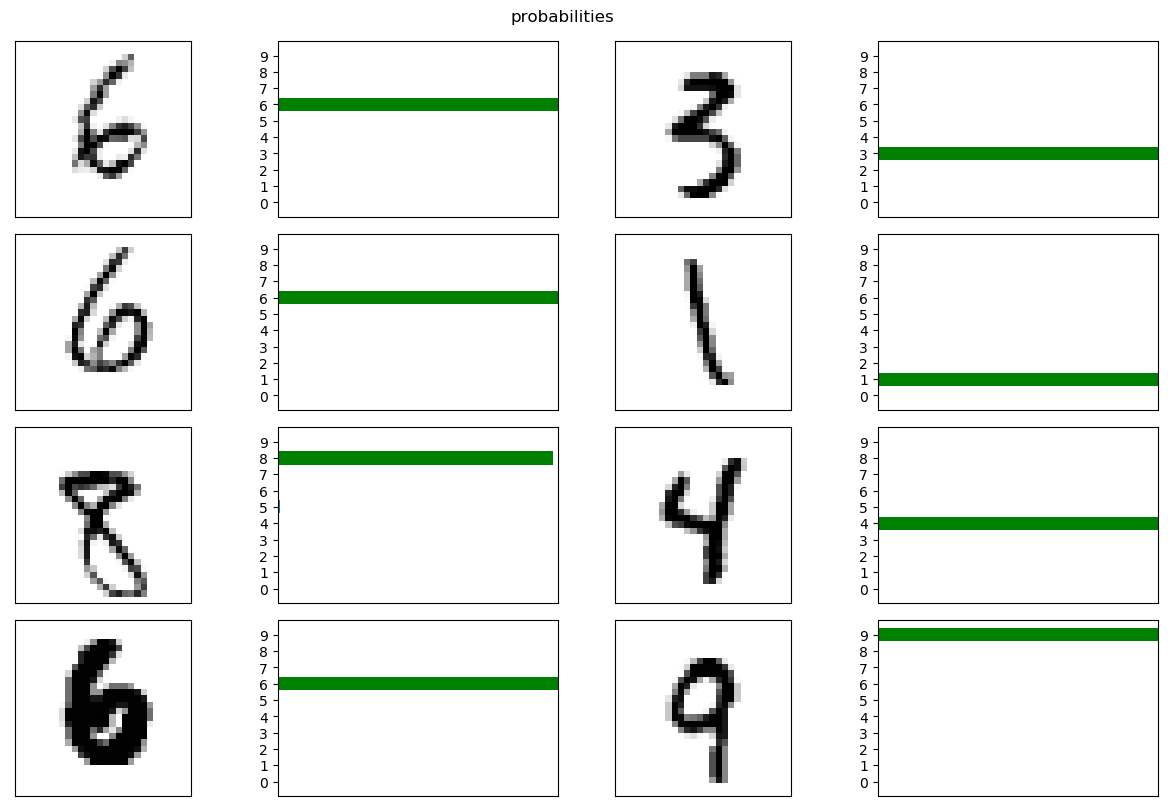

In [15]:
nr = 2000
showImagesWithProbabilities(images=x_test[nr:nr+16], probs=prob[nr:nr+16], labels=labels_test[nr:nr+16])